In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re

# Read in prepared dataset

In [2]:
combined=pd.read_csv('combined.csv',index_col=0)

In [3]:
print(combined.head())

       uid_rental        uid_book  uid_borrowers         out    returned  \
0  67337524405974  61277990803581  6407399394844  2003-02-09  2003-03-01   
1  86074485118530  63129330503483  6407399394844  1994-05-31  1994-06-24   
2  83474086825147  14481138517750  6407399394844  2008-06-04  2008-07-01   
3  74692526227755  14481138517750  6407399394844  2008-03-21  2008-04-12   
4  48570202472671  31927003009928  6407399394844  1998-04-09  1998-04-18   

              author  length publication_date  rental_period        subject  \
0        Donna Adell     343       1979-02-19             30     Historical   
1      Steven Briney     235       1980-03-22             30        fantasy   
2      Lessie Arnold     364       1926-11-28             30        fantasy   
3      Lessie Arnold     364       1926-11-28             30        fantasy   
4  Jerri Vandenbosch     232       1966-02-19              7  SHORT STORIES   

                                            title         dob addres

# Age

* Lets look at distribution of ages of all our borrowers
* Lets see how the distribution of ages of the borrowers varies depending on gender

(we'll have to quickly clean the borrowers dataframe before we can do this)

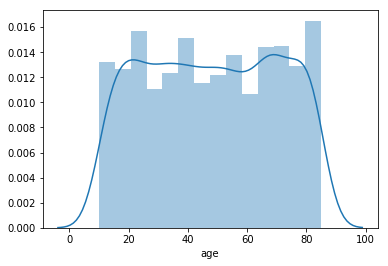

In [4]:
borrowers=pd.read_csv('borrowers_out.csv')
borrowers.columns=['dob','uid_borrowers','address','ethnic_group','gender','join_date']
borrowers.dob=pd.to_datetime(borrowers.dob)
from datetime import datetime
from datetime import date

def calculate_age(born):
    #born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
#The above code cleans the borrowers data frame


borrowers['age'] = borrowers.dob.apply(calculate_age)
sns.distplot(borrowers.age)  

Lets see how the distribution of ages of the borrowers varies depending on gender

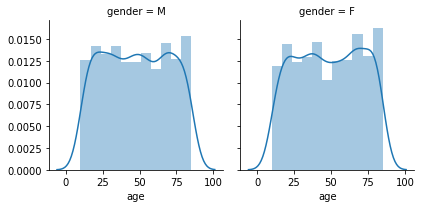

In [5]:
g = sns.FacetGrid(borrowers, col='gender')

g.map(sns.distplot, 'age')

#sns.lmplot(borrowers.age,col='') 

## How does age effect the the probability of a book being returned late?
* small correlation: older borrowers are slightly more likely to return books late


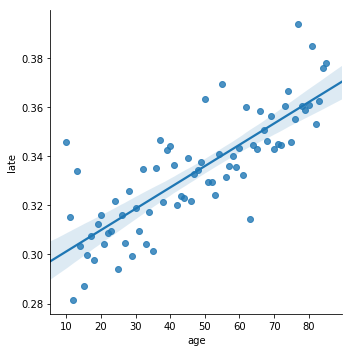

In [6]:
group_age=combined[['age', 'late']].groupby(['age']).mean().sort_values(by='late', ascending=True).reset_index()
sns.lmplot('age','late',group_age)

# Length of Book

How does length of a book determine whether a book will be delivered late?

* Very little correlation for linear regression
* non-linear shows some slight variation
       Both graphs shows a number of of outliers, putting the pages into bins may help here....
    



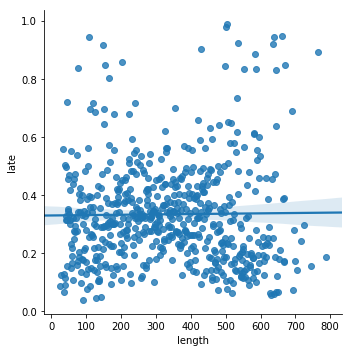

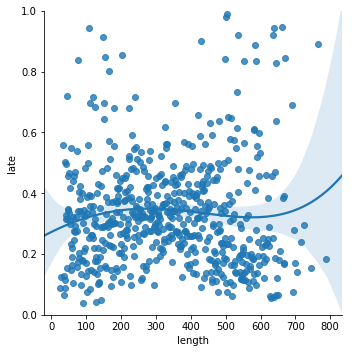

In [7]:
length_group=combined[["length", "late"]].groupby(['length'], as_index=False).mean().sort_values(by='late', ascending=False).reset_index()

graph1=sns.lmplot('length','late',length_group)
print(graph1)
graph2=sns.lmplot('length','late',length_group, order=4)
graph2.set(ylim=(0,1))
print(graph2)
#plt.scatplot('length','late',length_group)

# Next steps

1. Put ages and lengths into bins
2. Use pointplot
3. Then use facet plot to see how they vary accross gender, ethnicity, topic

# Age into Bins 

* putting ages into bins should give us more insightful plots

In [8]:
combined['age_bin'] = pd.cut(combined.age, [0, 16, 21, 30,40 ,50,60,70,80,90,200], 
                             labels=['0-16', '16-21', '21-30','30-40','40-50','50-60','60-70','70-80','80-90','90+'])


[Text(0, 0.5, 'Prob. of Returning Late'), Text(0.5, 0, 'Age')]

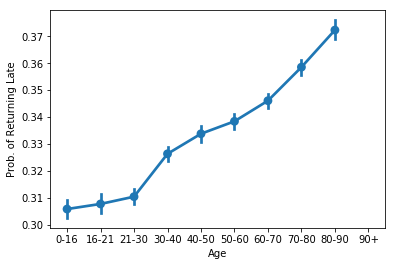

In [9]:
graph=sns.pointplot(x='age_bin',y='late', data=combined)
graph.set(xlabel='Age',ylabel='Prob. of Returning Late')

# How does the above graph change when looking at Male vs Female?
* certain age groups are more likely to return a book late than others...

[Text(0, 0.5, 'Prob. of Returning Late'), Text(0.5, 0, 'Age')]

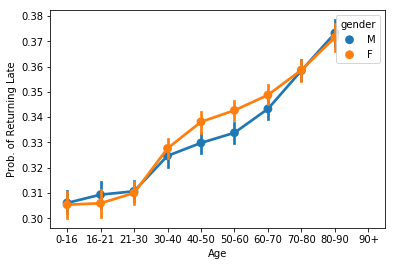

In [10]:
g2=sns.pointplot(x='age_bin',y='late', data=combined, hue='gender')
g2.set(xlabel='Age',ylabel='Prob. of Returning Late')

#g=sns.FacetGrid(combined, col='gender')    Couldnt get facet plot to work, ValueError: Could not interpret input 'age_bin'
#g=g.map(sns.barplot,
#        x='age_bin',
#        y='late')

Below we see that accross all ages, the rental period is a significant variable when considering whether somebody will return a book late.

[Text(0, 0.5, 'Prob. of Returning Late'), Text(0.5, 0, 'Age')]

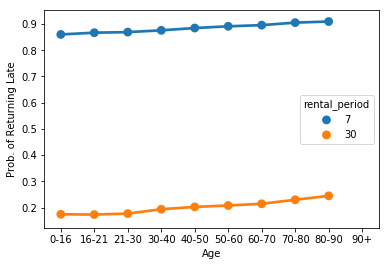

In [11]:
g3=sns.pointplot(x='age_bin',y='late', data=combined, hue='rental_period')
g3.set(xlabel='Age',ylabel='Prob. of Returning Late')

# Book length into bins

In [12]:
combined['length_bin'] = pd.cut(combined.length, [0,100 ,200,300,400 ,500,600,700,800], 
                             labels=['0-100', '100-200', '200-300','300-400','400-500','500-600','600-700','700-800'])

[(0.3, 0.35)]

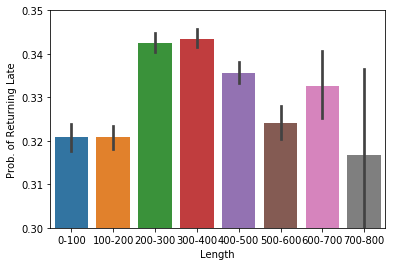

In [13]:
g4=sns.barplot(x='length_bin',y='late', data=combined)
g4.set(xlabel='Length',ylabel='Prob. of Returning Late')
g4.set(ylim=(0.3,0.35))

[Text(0, 0.5, 'Prob. of Returning Late'), Text(0.5, 0, 'Length')]

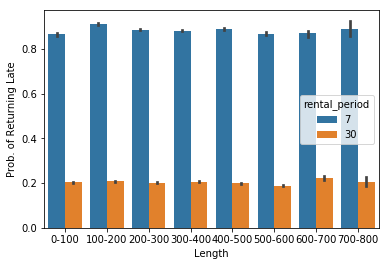

In [14]:
g4=sns.barplot(x='length_bin',y='late', data=combined, hue='rental_period')
g4.set(xlabel='Length',ylabel='Prob. of Returning Late')
